# About Notebook


This notebook implements a **multi-layer neural network (MLP) from scratch** using **NumPy only** — no frameworks like TensorFlow, PyTorch, or scikit-learn.

---

### 🔧 What’s Inside
- Custom **activation functions**: ReLU (+ derivative)
- Custom **loss**: Mean Squared Error (+ derivative)
- **Parameter initialization**: He initialization for ReLU layers
- **Forward propagation**: fully vectorized
- **Backpropagation**: manually derived gradients
- **Gradient Descent update loop**
- **Loss visualization** and **prediction plots**

---

###  Model Architecture
Default network: **1 → 10 → 10 → 1**

| Layer | Activation | Description |
|--------|-------------|--------------|
| Hidden 1 | ReLU | introduces nonlinearity |
| Hidden 2 | ReLU | deeper feature extraction |
| Output | Linear | regression output |

---

###  Math Overview
**Forward pass**

**Loss (MSE)**

**Backprop**

---

### 🧮 Dataset
Synthetic regression problem:

---

### 📊 Visualizations
1. **Loss curve** — shows training convergence  
2. **Predictions vs True Data** — compares fitted curve to real values

---

###  Why Build It From Scratch?
- Understand every mathematical step behind backpropagation  
- See how neural networks actually learn  
- Build a foundation before using libraries  
- Easy to extend to classification (Softmax + Cross-Entropy), mini-batches, Adam, dropout, etc.

---

###  Next Steps
- Add **Softmax** for classification  
- Implement **mini-batch training**  
- Add **Adam optimizer**  
- Apply **L2 regularization** or **dropout**


## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create Dataset

In [2]:
np.random.seed(0)
X = np.linspace(-2, 2, 200).reshape(-1, 1)
y = np.sin(3 * X) + 0.2 * np.random.randn(200, 1)

## See How Data Looks

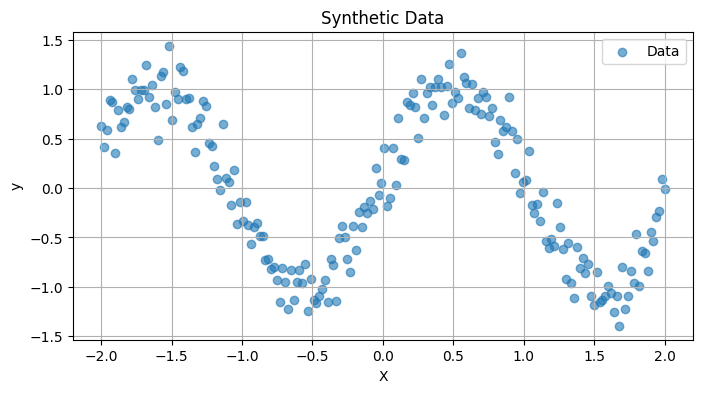

In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.6, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

## Activations Fuc^n

### sigmoid Fuction

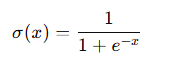

### Derivative of sigmoid

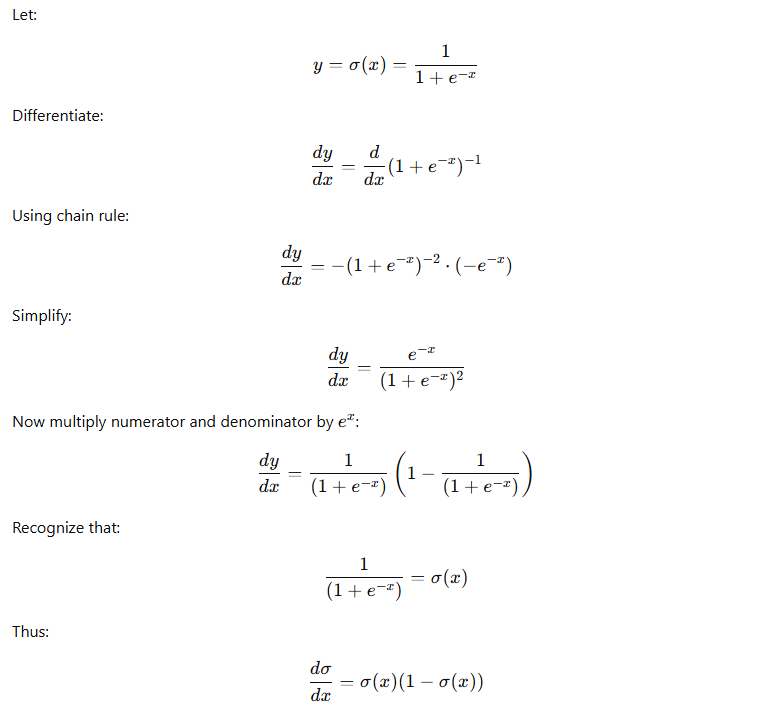

### ReLU Function And it's Derivative

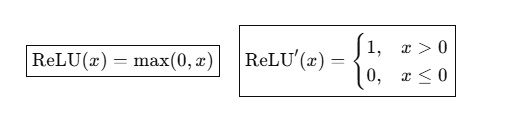

In [4]:
# sigmoid Function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

# Derivative of sigmoid
def Derivativeofsigmoid(x):
  s = sigmoid(x)
  return s * (1 - s)

# ReLU Function
def relu(x):
  return np.maximum(0,x)

# Derivative of ReLU
def Derivativeofrelu(x):
  return (x > 0).astype(float)

## Mean Squared Error loss function

In [5]:
def mse_loss(y_true, y_pred):
    """Mean Squared Error loss function"""
    return np.mean((y_true - y_pred)**2)

## Initialize Parameters(layers)


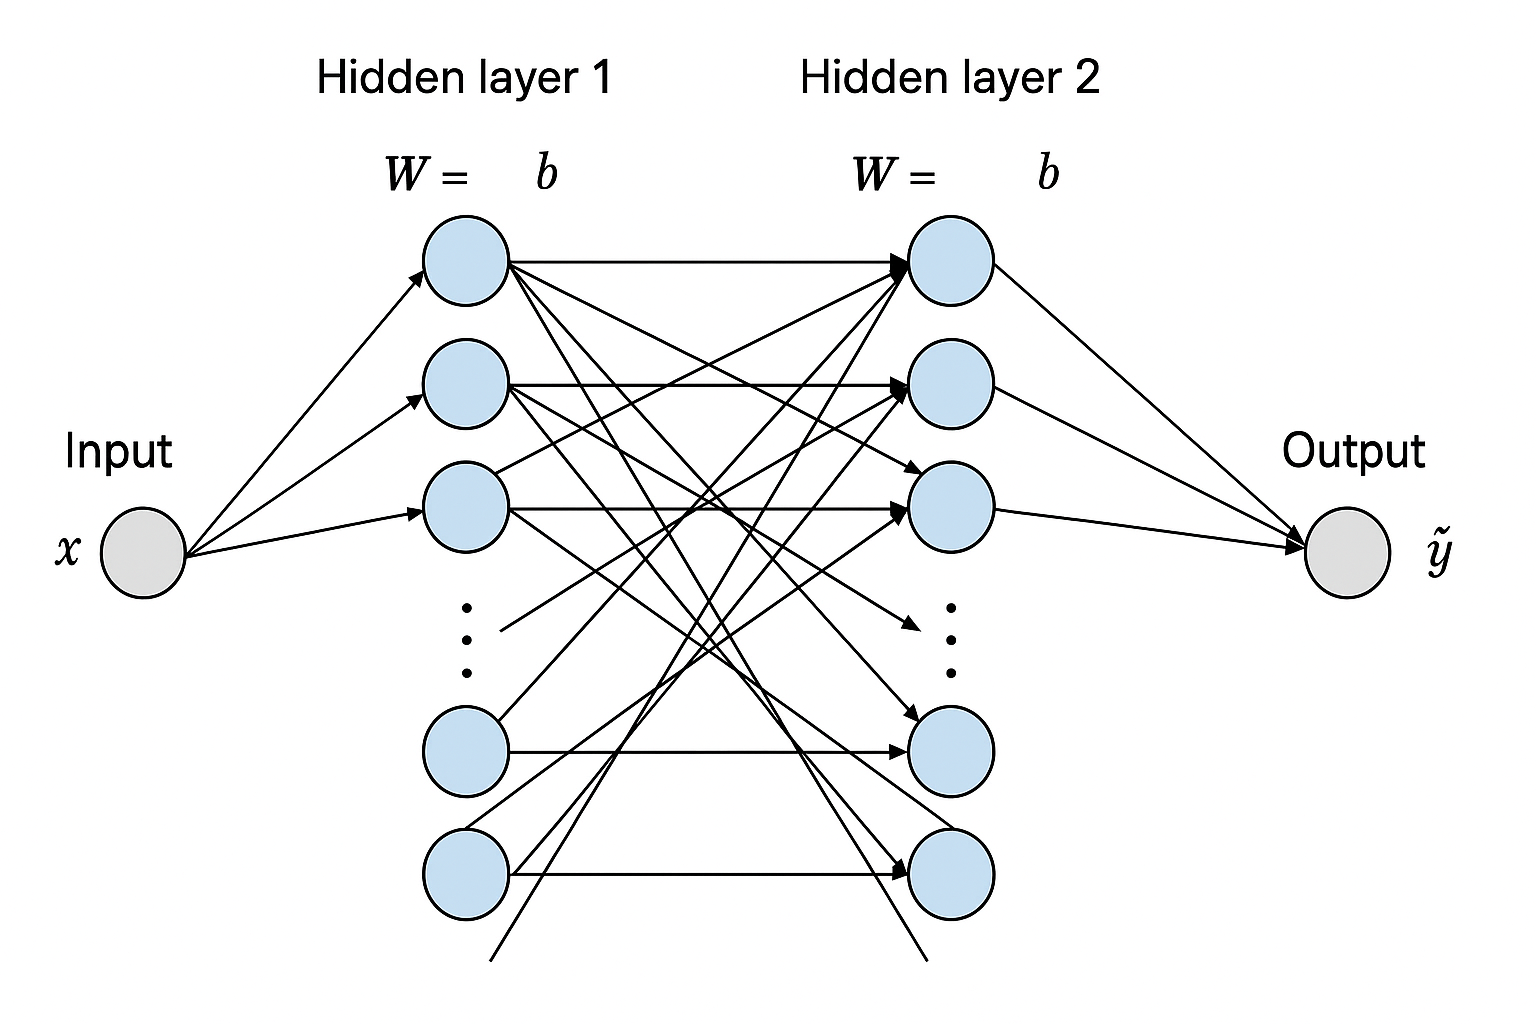

In [6]:
def initialize_parameters(layers):
    np.random.seed(42)
    params = {}
    for i in range(1, len(layers)):
        params[f"W{i}"] = np.random.randn(layers[i-1], layers[i]) * 0.1  # small random numbers
        params[f"b{i}"] = np.zeros((1, layers[i]))                       # start biases at 0
    return params

# Example
params = initialize_parameters([1, 10, 10, 1])
print("W1 shape:", params["W1"].shape)
print("b1 shape:", params["b1"].shape)

W1 shape: (1, 10)
b1 shape: (1, 10)


## Forward Propagation

In [7]:
def forward(X, params, activation='relu'):
    """
    Perform forward propagation through all layers.
    Returns prediction and a cache for backpropagation.
    """
    caches = {"A0": X}
    A = X
    L = len(params) // 2  # number of layers (pairs of W and b)

    for l in range(1, L):
        Z = A @ params[f"W{l}"] + params[f"b{l}"]
        if activation == 'relu':
            A = relu(Z)
        elif activation == 'sigmoid':
            A = sigmoid(Z)
        caches[f"Z{l}"] = Z
        caches[f"A{l}"] = A

    # Last layer (output) — linear for regression
    ZL = A @ params[f"W{L}"] + params[f"b{L}"]
    y_pred = ZL
    caches[f"Z{L}"] = ZL
    caches[f"A{L}"] = y_pred
    return y_pred, caches


In [8]:
# Example: network 1 → 10 → 10 → 1
params = initialize_parameters([1, 10, 10, 1])

# Forward pass
y_pred, cache = forward(X, params)
print("Predicted shape:", y_pred.shape)

Predicted shape: (200, 1)


## Backpropagation

In [9]:
def backward(params, cache, y_true, activation='relu'):
    grads = {}
    L = len(params) // 2
    m = y_true.shape[0]

    # Final layer (output)
    y_pred = cache[f"A{L}"]
    dZL = (2.0 / m) * (y_pred - y_true)  # dLoss/dZL
    grads[f"dW{L}"] = cache[f"A{L-1}"].T @ dZL
    grads[f"db{L}"] = np.sum(dZL, axis=0, keepdims=True)

    # Backpropagate through hidden layers
    dA_prev = dZL @ params[f"W{L}"].T

    for l in reversed(range(1, L)):
        if activation == 'relu':
            dZ = dA_prev * Derivativeofrelu(cache[f"Z{l}"])
        elif activation == 'sigmoid':
            dZ = dA_prev * Derivativeofsigmoid(cache[f"Z{l}"])

        grads[f"dW{l}"] = cache[f"A{l-1}"].T @ dZ
        grads[f"db{l}"] = np.sum(dZ, axis=0, keepdims=True)
        if l > 1:
            dA_prev = dZ @ params[f"W{l}"].T

    return grads

In [10]:
grads = backward(params, cache, y)
for key in grads:
    print(key, grads[key].shape)


dW3 (10, 1)
db3 (1, 1)
dW2 (10, 10)
db2 (1, 10)
dW1 (1, 10)
db1 (1, 10)


## Gradient-descent parameter update

In [11]:
def update_params(params, grads, lr=0.01):
    """Gradient-descent parameter update"""
    L = len(params) // 2
    for l in range(1, L + 1):
        params[f"W{l}"] -= lr * grads[f"dW{l}"]
        params[f"b{l}"] -= lr * grads[f"db{l}"]
    return params


## How It Fits in the Training Loop

In [18]:
params = initialize_parameters([1, 10, 10, 1])
lr = 0.01
epochs = 6000
losses = []

for epoch in range(epochs):
    # Forward
    y_pred, cache = forward(X, params)

    # Loss
    loss = mse_loss(y, y_pred)
    losses.append(loss)

    # Backward
    grads = backward(params, cache, y)

    # Update (Gradient Descent)
    params = update_params(params, grads, lr)

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f}")


Epoch 0 | Loss: 0.61182
Epoch 200 | Loss: 0.60882
Epoch 400 | Loss: 0.60594
Epoch 600 | Loss: 0.60094
Epoch 800 | Loss: 0.59158
Epoch 1000 | Loss: 0.57275
Epoch 1200 | Loss: 0.54000
Epoch 1400 | Loss: 0.50391
Epoch 1600 | Loss: 0.48015
Epoch 1800 | Loss: 0.46817
Epoch 2000 | Loss: 0.46132
Epoch 2200 | Loss: 0.45563
Epoch 2400 | Loss: 0.44916
Epoch 2600 | Loss: 0.44050
Epoch 2800 | Loss: 0.42821
Epoch 3000 | Loss: 0.41016
Epoch 3200 | Loss: 0.38245
Epoch 3400 | Loss: 0.34177
Epoch 3600 | Loss: 0.28982
Epoch 3800 | Loss: 0.23782
Epoch 4000 | Loss: 0.19165
Epoch 4200 | Loss: 0.15651
Epoch 4400 | Loss: 0.13289
Epoch 4600 | Loss: 0.11788
Epoch 4800 | Loss: 0.10851
Epoch 5000 | Loss: 0.10248
Epoch 5200 | Loss: 0.09837
Epoch 5400 | Loss: 0.09435
Epoch 5600 | Loss: 0.09100
Epoch 5800 | Loss: 0.08990


## Results

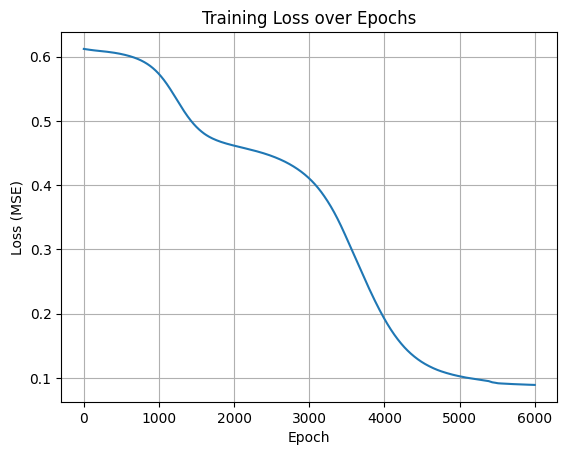

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()


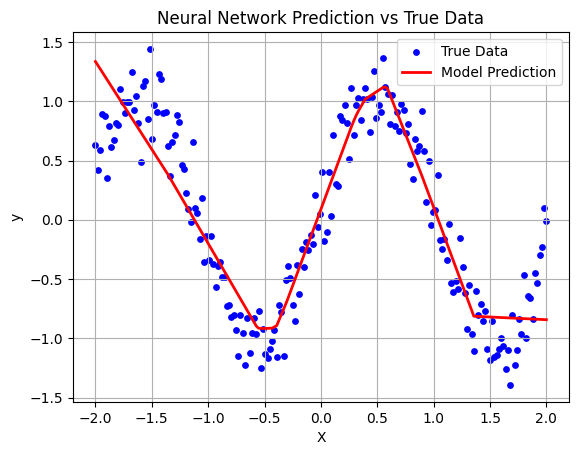

In [20]:
# Predict again using the trained parameters
y_pred, cache = forward(X, params) # Use the defined 'forward' function

# Sort X for smooth plotting
order = np.argsort(X[:, 0])
X_sorted = X[order]
y_sorted = y_pred[order]

# Plot
plt.scatter(X, y, label="True Data", color='blue', s=15)
plt.plot(X_sorted, y_sorted, label="Model Prediction", color='red', linewidth=2)
plt.title("Neural Network Prediction vs True Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()